<a href="https://colab.research.google.com/github/ArifAygun/Sentiment-Analysis-SMRT/blob/main/SMRT_Statistical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis of SMRT Systems Capterra Website Reviews**



https://www.capterra.com/p/175015/SMRT-POS/reviews/

#### IMPORT LIBRARIES AND DATASET

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import nltk

from nltk.corpus import stopwords
from gensim import corpora, models
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/SMRT/

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/SMRT


In [ ]:
reviews= pd.read_excel('Capterra_SMRT_Final.xlsx', 'Final')

#### DATA PREPROCESSING

In [ ]:
reviews.head().transpose()

,0,1,2,3,4
Date,2019-08-20 00:00:00,2020-06-18 00:00:00,2020-08-10 00:00:00,2020-08-10 00:00:00,2020-08-10 00:00:00
User Name,Joshua V.,Daniel C.,Kyle M.,Jason Y.,Amy W.
User Position,Ceo,Owner,Director of Operations,Vice President,Manager
Department,Consumer Services,Consumer Services,Consumer Services,Retail,Consumer Services
Employees,1-10,11-50,11-50,51-200,11-50
Use Period,Less than 6 months,2+ years,1-2 years,2+ years,2+ years
Overall Rating,5,5,5,5,5
Ease of Use,5,5,5,5,4
Customer Service,5,5,5,5,5
Features,5,5,5,5,4


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     115 non-null    datetime64[ns]
 1   User Name                115 non-null    object        
 2   User Position            113 non-null    object        
 3   Department               115 non-null    object        
 4   Employees                115 non-null    object        
 5   Use Period               115 non-null    object        
 6   Overall Rating           115 non-null    int64         
 7   Ease of Use              115 non-null    int64         
 8   Customer Service         115 non-null    int64         
 9   Features                 115 non-null    int64         
 10  Value for Money          110 non-null    float64       
 11  Likelihood to Recommend  115 non-null    int64         
 12  Headline                 115 non-nul

**Drop 'User Name' (Unnecessary), 'Vendor Response' (Only 4/115 Data Point) Columns**

In [ ]:
reviews = reviews.drop(['User Name', 'Vendor Response'], axis=1)

#### MISSING & UNIQUE VALUES

**Missing Values**

In [ ]:
missing_values = reviews.isna().sum()

print(missing_values)

Date                        0
User Position               2
Department                  0
Employees                   0
Use Period                  0
Overall Rating              0
Ease of Use                 0
Customer Service            0
Features                    0
Value for Money             5
Likelihood to Recommend     0
Headline                    0
Overall Rev                21
Pros                        0
Cons                        0
Alternative Considered     95
Reasons for Choosing       62
Switched From              68
Reasons for Switching      35
dtype: int64


**Filling Missing Values**

In [ ]:
# Fill missing values in 'User Position' with "Verified Reviewer"
reviews['User Position'].fillna('Verified Reviewer', inplace=True)

# Fill missing values in 'Value for Money' with the mean of the column
mean_value_for_money = reviews['Value for Money'].mean()
reviews['Value for Money'].fillna(mean_value_for_money, inplace=True)

#Convert dtype of "Value for Money"
reviews['Value for Money'] = reviews['Value for Money'].astype(int)

missing_values = reviews.isna().sum()
print(missing_values)

Date                        0
User Position               0
Department                  0
Employees                   0
Use Period                  0
Overall Rating              0
Ease of Use                 0
Customer Service            0
Features                    0
Value for Money             0
Likelihood to Recommend     0
Headline                    0
Overall Rev                21
Pros                        0
Cons                        0
Alternative Considered     95
Reasons for Choosing       62
Switched From              68
Reasons for Switching      35
dtype: int64


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     115 non-null    datetime64[ns]
 1   User Position            115 non-null    object        
 2   Department               115 non-null    object        
 3   Employees                115 non-null    object        
 4   Use Period               115 non-null    object        
 5   Overall Rating           115 non-null    int64         
 6   Ease of Use              115 non-null    int64         
 7   Customer Service         115 non-null    int64         
 8   Features                 115 non-null    int64         
 9   Value for Money          115 non-null    int64         
 10  Likelihood to Recommend  115 non-null    int64         
 11  Headline                 115 non-null    object        
 12  Overall Rev              94 non-null

**Unique Values**

In [ ]:
unique_value_counts = reviews.nunique()

# Print the number of unique values for each column
print(unique_value_counts)

Date                        80
User Position               23
Department                   8
Employees                    4
Use Period                   4
Overall Rating               3
Ease of Use                  5
Customer Service             5
Features                     4
Value for Money              3
Likelihood to Recommend      6
Headline                   112
Overall Rev                 94
Pros                       115
Cons                       115
Alternative Considered      12
Reasons for Choosing        53
Switched From               14
Reasons for Switching       80
dtype: int64


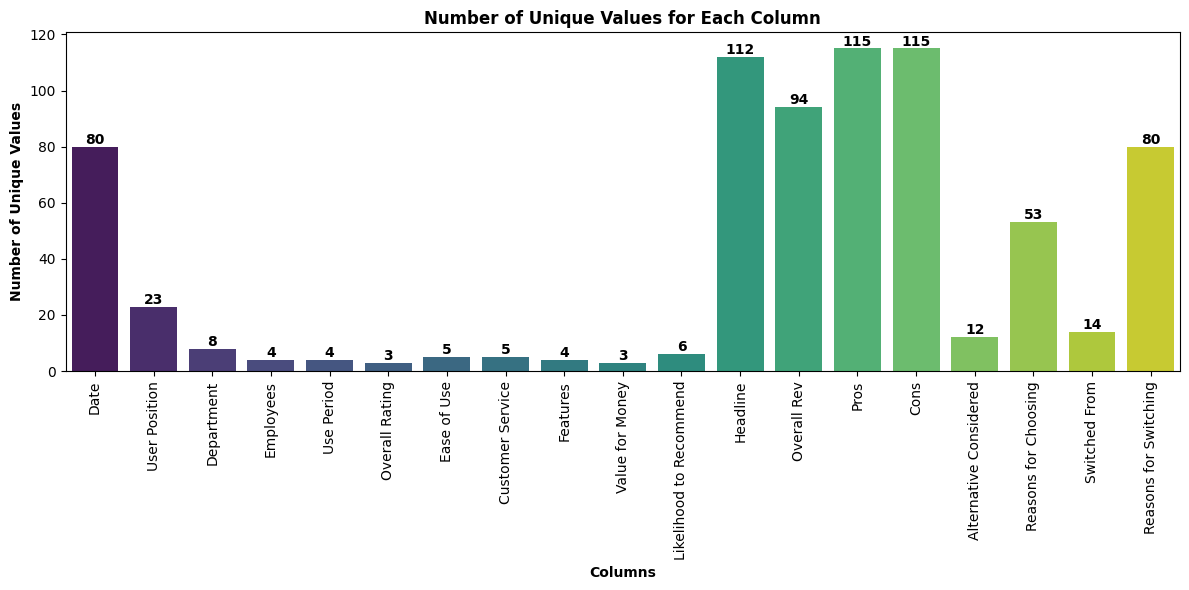

In [ ]:
unique_value_counts = reviews.nunique()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=unique_value_counts.index, y=unique_value_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Columns', weight='bold')
plt.ylabel('Number of Unique Values', weight='bold')
plt.title('Number of Unique Values for Each Column', weight='bold')
plt.tight_layout()


for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', weight='bold', xytext=(0, 5),
                textcoords='offset points')

plt.show()

#### PERSONAL INFORMATIONS

##### USER POSITION

In [ ]:
# Get the counts of each unique value in the "User Position" column
position_counts = reviews['User Position'].value_counts()

# Print the number of each unique value with its count
print("User Position Counts:")
print(position_counts)

User Position Counts:
Owner                       52
President                   21
Ceo                         10
Manager                      6
Vice President               4
General Manager              3
Verified Reviewer            2
Customer Service             2
Bookkeeper                   1
Store General Manager        1
production manager           1
Support Specialist           1
Store Manager                1
Chief Operations Officer     1
Coordinator                  1
President/CEO                1
Admin assistant/manager      1
Vice president               1
President CEO                1
Director of Operations       1
General manager              1
Operations Manager           1
Route Operations Manager     1
Name: User Position, dtype: int64


**Replace values containing "manager" (case-insensitive) with "Manager"**

In [ ]:
# Replace values containing "manager" (case-insensitive) with "Manager"
reviews['User Position'] = reviews['User Position'].str.replace(r'.*manager.*', 'Manager', case=False, regex=True)

# Get the updated counts of each unique value in the "User Position" column
position_counts = reviews['User Position'].value_counts()

# Print the number of each unique value with its count
print("User Position Counts:")
print(position_counts)

User Position Counts:
Owner                       52
President                   21
Manager                     16
Ceo                         10
Vice President               4
Customer Service             2
Verified Reviewer            2
Director of Operations       1
President/CEO                1
President CEO                1
Vice president               1
Bookkeeper                   1
Coordinator                  1
Chief Operations Officer     1
Support Specialist           1
Name: User Position, dtype: int64


**Standardize "User Position" values by converting any value containing "president" to "President"**

In [ ]:
reviews['User Position'] = reviews['User Position'].str.replace(r'.*president.*', 'President', case=False, regex=True)

# Get the updated counts of each unique value in the "User Position" column
position_counts = reviews['User Position'].value_counts()

# Print the number of each unique value with its count
print("User Position Counts:")
print(position_counts)


User Position Counts:
Owner                       52
President                   28
Manager                     16
Ceo                         10
Customer Service             2
Verified Reviewer            2
Director of Operations       1
Bookkeeper                   1
Coordinator                  1
Chief Operations Officer     1
Support Specialist           1
Name: User Position, dtype: int64


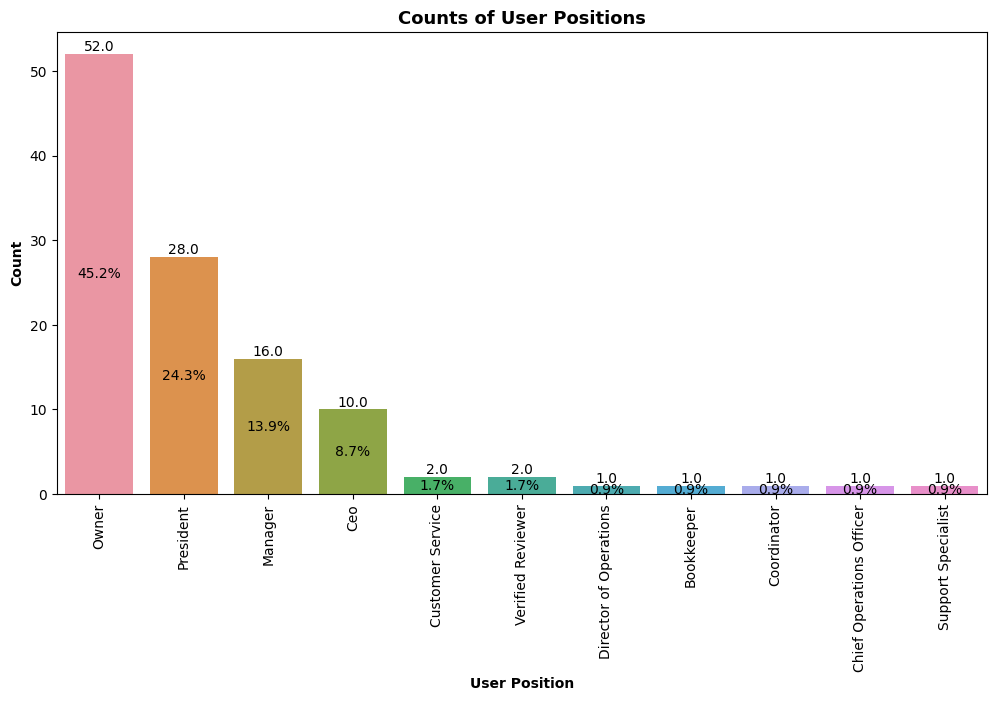

In [ ]:
user_position_counts = reviews['User Position'].value_counts()

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=reviews, x='User Position', order=user_position_counts.index)
plt.xticks(rotation=90)

plt.xlabel('User Position', fontsize=10, fontweight='bold')
plt.ylabel('Count', fontsize=10, fontweight='bold')
plt.title('Counts of User Positions', fontsize=13, fontweight='bold')

total_counts = len(reviews)  # Total number of counts for calculating percentages

for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * p.get_height() / total_counts:.1f}%'
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(count, (x, y), ha='center', va='bottom')
    ax.annotate(percentage, (x, y/2), ha='center', va='center')

plt.show()

##### DEPARTMENTS

In [ ]:
# Get the counts of each unique value in the "Department" column
department_counts = reviews['Department'].value_counts()

# Print the number of each unique value with its count
print("Department Counts:")
print(department_counts)

Department Counts:
Consumer Services       47
Retail                  39
Textiles                14
Apparel & Fashion        7
Hospitality              5
Wellness and Fitness     1
Computer Software        1
Accounting               1
Name: Department, dtype: int64


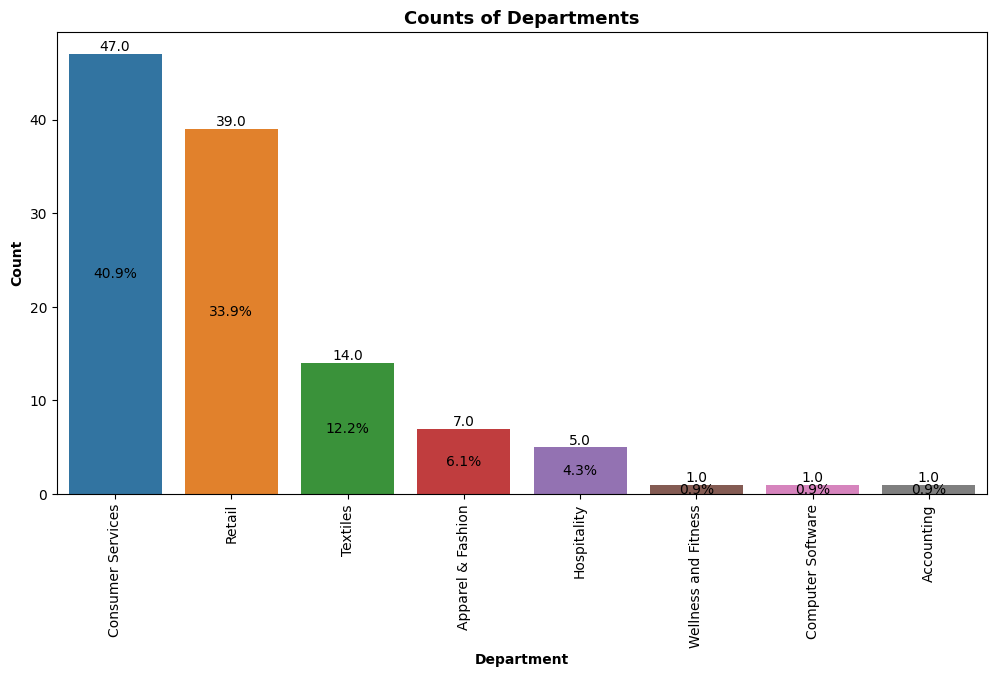

In [ ]:
department_counts = reviews['Department'].value_counts()

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=reviews, x='Department', order=department_counts.index)
plt.xticks(rotation=90)

plt.xlabel('Department', fontsize=10, fontweight='bold')
plt.ylabel('Count', fontsize=10, fontweight='bold')
plt.title('Counts of Departments', fontsize=13, fontweight='bold')

total_counts = len(reviews)  # Total number of counts for calculating percentages

for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * p.get_height() / total_counts:.1f}%'
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(count, (x, y), ha='center', va='bottom')
    ax.annotate(percentage, (x, y/2), ha='center', va='center')

plt.show()

##### EMPLOYEES & USING PERIOD

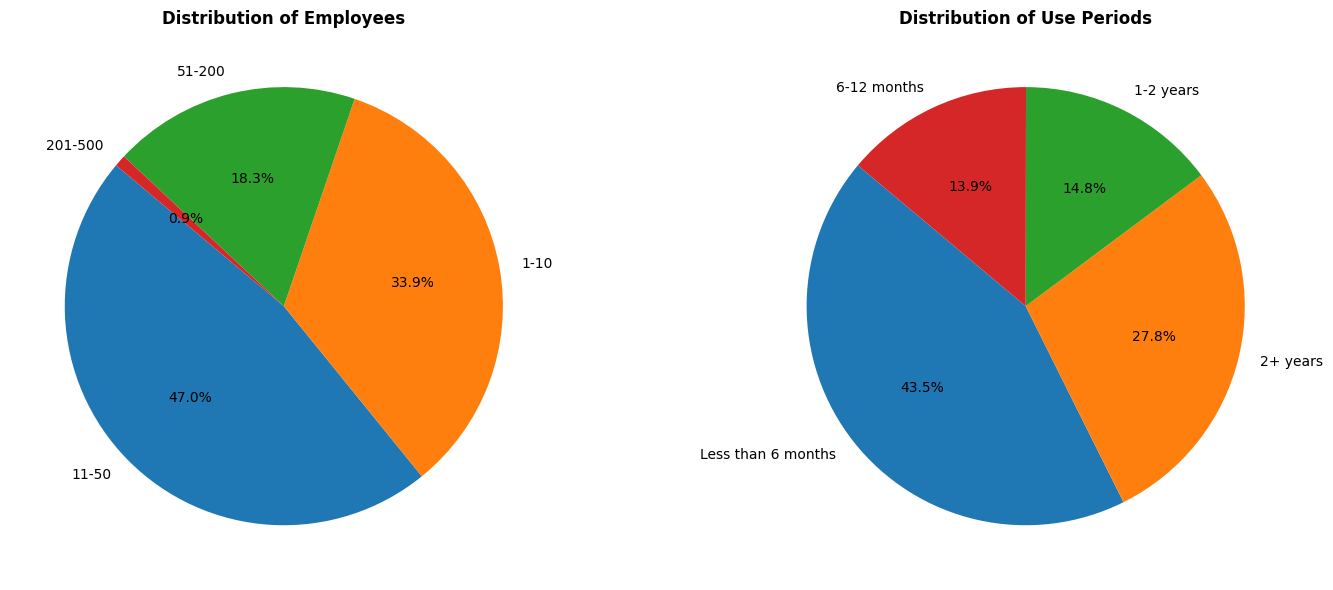

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

employees_counts = reviews['Employees'].value_counts()

wedges, texts, autotexts = axes[0].pie(
    employees_counts.values,
    labels=employees_counts.index,
    autopct='%1.1f%%',
    startangle=140,
)

axes[0].set_title('Distribution of Employees', fontweight='bold')

use_period_counts = reviews['Use Period'].value_counts()

wedges, texts, autotexts = axes[1].pie(
    use_period_counts.values,
    labels=use_period_counts.index,
    autopct='%1.1f%%',
    startangle=140,
)

axes[1].set_title('Distribution of Use Periods', fontweight='bold')

plt.tight_layout()
plt.show()

#### RATINGS

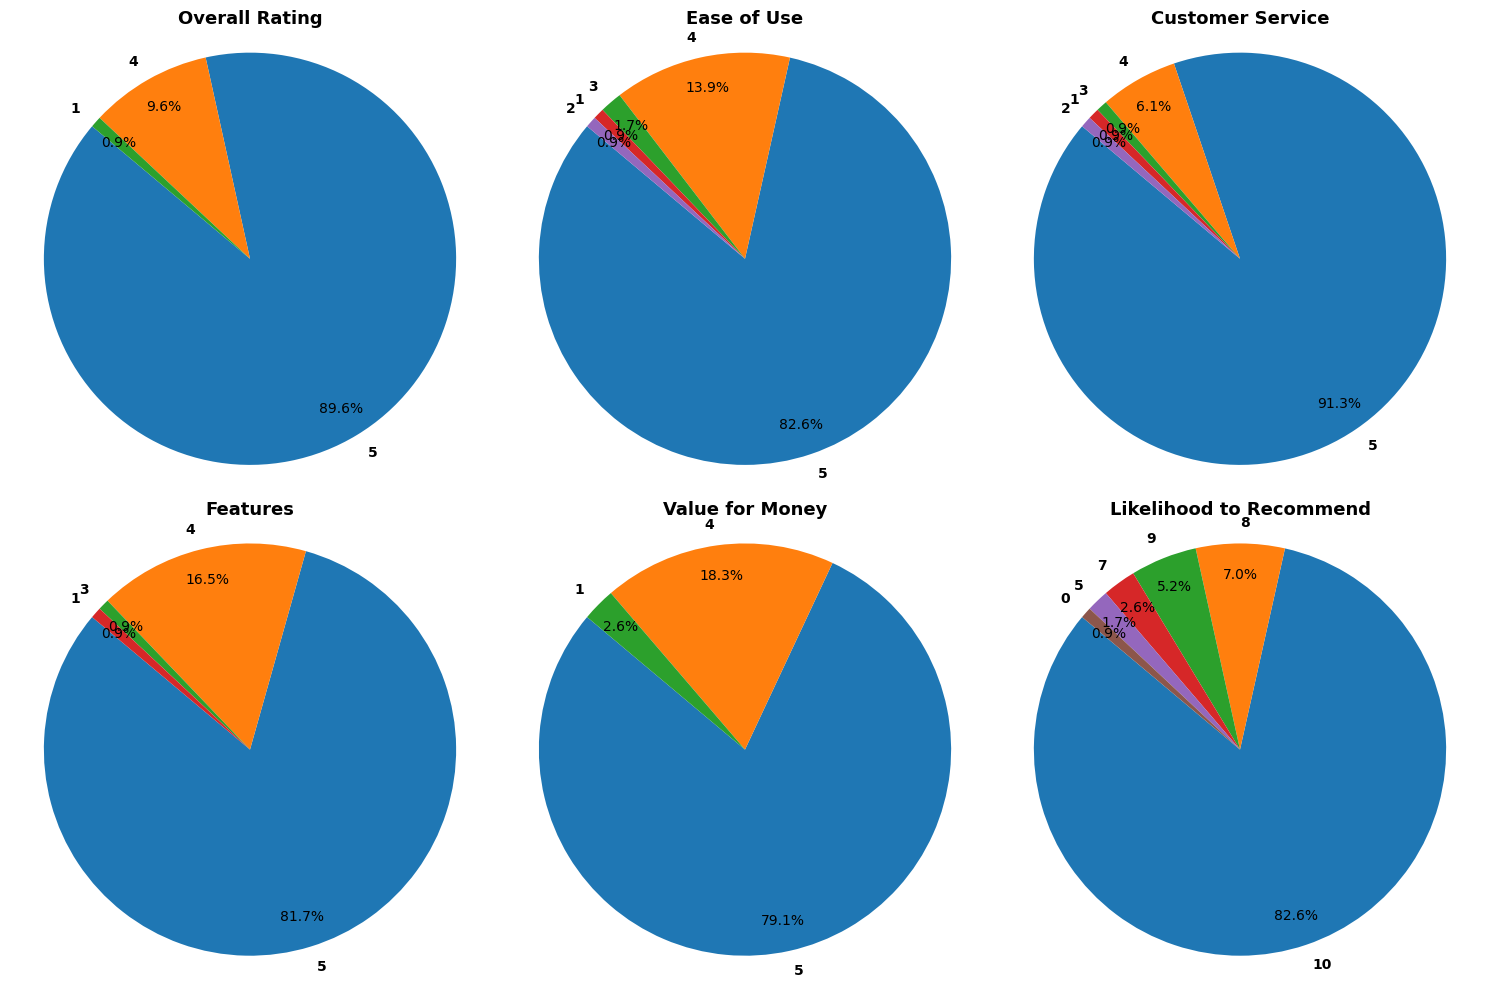

In [ ]:
columns_to_count = [
    'Overall Rating',
    'Ease of Use',
    'Customer Service',
    'Features',
    'Value for Money',
    'Likelihood to Recommend'
]

fig, axes = plt.subplots(2, 3, figsize=(15, 10), tight_layout=True)
axes = axes.ravel()

for i, column in enumerate(columns_to_count):
    column_counts = reviews[column].value_counts()
    wedges, texts, autotexts = axes[i].pie(
        column_counts,
        labels=column_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        pctdistance=0.85
    )

    axes[i].set_title(f'{column}', fontsize=13, fontweight='bold')

    for autotext, text in zip(autotexts, texts):
        autotext.set(size=10)
        text.set(size=10, weight='bold')

    axes[i].axis('equal')

plt.subplots_adjust(hspace=0.5)
plt.show()

#### NLP

**Overall Reviews**

**Text Preprocessing:**

Before performing NLP tasks, it's important to preprocess the text data, which typically involves removing stopwords, punctuation, and converting text to lowercase.

In [ ]:
def preprocess_text(text):
    if isinstance(text, str):  # Check if the value is a string
        # Tokenize the text
        words = word_tokenize(text.lower())

        # Remove stopwords and punctuation
        words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]

        # Lemmatize words
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]

        return ' '.join(words)
    else:
        return ''  # Return an empty string for non-text values (NaN)

In [ ]:
reviews['Cleaned_Overall_Rev'] = reviews['Overall Rev'].apply(preprocess_text)

**Sentiment Analysis:**

Sentiment analysis helps determine the sentiment (positive, negative, or neutral) of text data. You can use libraries like VADER or TextBlob for sentiment analysis.

In [ ]:
def analyze_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = analyzer.polarity_scores(text)
    return sentiment_scores

# Apply sentiment analysis to the 'Cleaned_Overall_Rev' column
reviews['Sentiment_Scores'] = reviews['Cleaned_Overall_Rev'].apply(analyze_sentiment)

# Extract the sentiment labels (positive, negative, neutral)
reviews['Sentiment_Label'] = reviews['Sentiment_Scores'].apply(lambda x: 'positive' if x['compound'] > 0 else ('negative' if x['compound'] < 0 else 'neutral'))


**Topic Modeling (using Latent Dirichlet Allocation - LDA):**

Topic modeling helps identify the main topics within a collection of documents. The following code demonstrates LDA topic modeling using the Gensim library.

In [ ]:
# Tokenize and preprocess text (using the 'Cleaned_Overall_Rev' column)
tokenized_reviews = [word_tokenize(text) for text in reviews['Cleaned_Overall_Rev']]

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(tokenized_reviews)
corpus = [dictionary.doc2bow(text) for text in tokenized_reviews]

# Train an LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Get topics and associated words
topics = lda_model.print_topics(num_words=5)

# Print the topics
for topic in topics:
    print(topic)


(0, '0.016*"system" + 0.013*"great" + 0.013*"experience" + 0.013*"smrt" + 0.010*"overall"')
(1, '0.018*"hidden" + 0.018*"sensitive" + 0.018*"content" + 0.013*"system" + 0.013*"po"')
(2, '0.019*"smrt" + 0.018*"customer" + 0.016*"u" + 0.015*"business" + 0.012*"delivery"')
(3, '0.038*"great" + 0.036*"smrt" + 0.020*"support" + 0.020*"customer" + 0.015*"experience"')
(4, '0.016*"software" + 0.014*"overall" + 0.013*"year" + 0.013*"business" + 0.010*"experience"')


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon and initialize the sentiment analyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Define a function to classify reviews as positive, negative, or neutral
def classify_sentiment(text):
    sentiment_scores = analyzer.polarity_scores(text)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment classification to the 'Cleaned_Overall_Rev' column
reviews['Sentiment_Label'] = reviews['Cleaned_Overall_Rev'].apply(classify_sentiment)

# Count the number of positive and negative reviews
positive_reviews_count = len(reviews[reviews['Sentiment_Label'] == 'Positive'])
negative_reviews_count = len(reviews[reviews['Sentiment_Label'] == 'Negative'])

# Print the counts
print(f'Number of Positive Reviews: {positive_reviews_count}')
print(f'Number of Negative Reviews: {negative_reviews_count}')

# Additional analysis of negative reviews can be performed here


Number of Positive Reviews: 80
Number of Negative Reviews: 9


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
